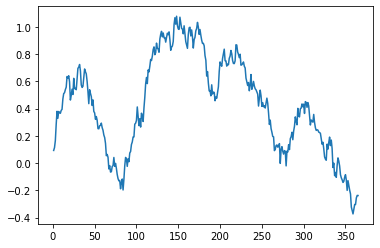

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd()

os.chdir(path)

# 위너 과정(Wiener process)에 대한 몬테카를로 시뮬레이션

T = 1 
D = 365
dt = T/D
 
n_col = [x for x in range(0, 500)]
n_row = [x for x in range(0, 500)]
df = pd.DataFrame(columns=n_col, index=n_row)
 
np.random.seed(0)

z=0

for x in range(1, 366):
    # np.random.normal의 loc는 정규분포의 평균, 즉 u=0, scale는 표준편차 즉 sigma=1. 따라서 여기는 표준정규분포가 됨.
    deltaZ = np.random.normal(loc=0, scale=1) * np.sqrt(dt)
    z = z + deltaZ
    df.loc[x, 1] = z

df.dropna(how='all', inplace=True, axis=1)
df.dropna(how='all', inplace=True, axis=0)
df = df.reset_index()
df.columns = range(df.shape[1])
# print(df)
plt.figure(figsize=(6, 4))
plt.plot(df.T.iloc[0].values, df.T.iloc[1].values)
plt.savefig('Wiener Process.png', dpi=200)
plt.show()

In [ ]:
# 오늘날 확률 과정은 금융공학 분야에서 가장 중요한 수학 및 수치 해석 분야이다.
# 현대 금융공학의 초기라 할 수 있는 1970년대와 1980년대 금융공학 연구의 가장 큰 목표는 주어진 특정한 금융공학 모형 하에서
# 옵션의 가격을 계산하는 닫힌 형태(closed form)의 공식을 구하는 것이었다.

# 이 목표는 최근 급격히 바뀌게 되었는데 그 이유는 금융 상품 하나의 가치를 계산하는 것뿐 아니라 
# 전체 파생상품 북을 일관되게 평가하는 것이 중요해 졌기 때문이다.
# 또한 금융기관 전체의 위험을 VaR, CVA 등의 위험 측정 방법을 사용하여 일관되게 측정하기 위해서는 
# 금융기관 전체 혹은 거래 상대방의 북을 모두 한꺼번에 고려해야 한다.

# 이런 방대한 작업은 더 유연하고 효율적인 수치 해석 방법으로만 풀 수 있다. 따라서 일반적인 확률과정과 몬테카를로 시뮬레이션이 중요하다.

# (1) 난수생성
# 난수를 생성하는 것은 모든 시뮬레이션 작업의 근간이다. 소볼 순열에 기반한 준-난수(quasi random)가 점점 많이 사용되고 있지만
# 아직은 일반적인 의사 난수(pseudo random number)가 여전히 이 분야의 기준이다.

# (2) 시뮬레이션
# 금융공학에서 가장 중요한 두 개의 시뮬레이션 작업은 확륩 변수(random variable)의 시뮬레이션과 확률 과정의 시뮬레이션이다.

# (3) 가치평가
# 파생상품 가치 평가는 크게 나누어 (특정한 행사일을 가지는) 유러피안 방식과 (특정한 행사 기간을 가지는) 아메리칸 방식으로 나뉜다.
# 특정한 복수의 날짜에 행사가 가능한 버뮤다 방식의 상품도 존재한다.

# (4) 위험측도
# 시뮬레이션은 VaR, CVaR, CVA 등의 위험 측도를 계산하는 용도에도 잘 맞는다


In [ ]:
# 몬테카를로 시뮬레이션은 금융공학에서 가장 중요하고 널리 쓰이는 수치해석 방법 중의 하나이다.
# 그 이유는 몬테카를로 시뮬레이션이 적분 등의 수학식이나 금융 파생상품의 가치를 계산할 때 가장 유연한 수치 해석 방법론이기 때문이다.
# 유연한 대신 상대적으로 계산 부담은 크다.

# 하나의 값을 추정하기 위해 수백, 수천 혹은 수백만의 복잡한 계산을 해야한다.

In [ ]:
# 확률과정은 단수하게 말하면 확률 변수의 수열이라고 할 수 있다.
# 따라서 확률 과정을 시뮬레이션한다는 것은 확률 변수를 반복해서 시뮬레이션하는 것과 유사하다고 할 수 있다.
# 다만 각 단계의 샘플이 독립적이 아니고 이전의 결과들에 의존한다는 차이점이 있다.
# 금융에서 사용되는 대부분의 확률 과정은 미래의 값이 바로 전의 과거 값에만 의존하고 
# 그보다 더 과거의 값들이나 전체 경로에는 의존하지 않는 마코프 특성을 가지는 확률 과정이다.
# 이러한 확률 과정을 무기억성(memoryless) 확률 과정이라고도 한다.

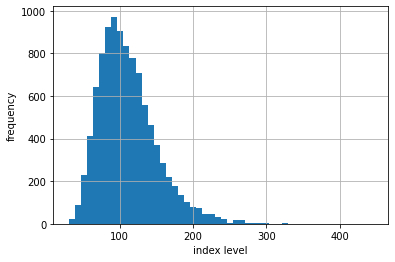

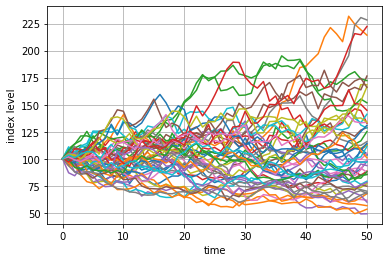

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 확률 미분 방정식(SDE)를 따르는 동적인 형태의 블랙-숄즈-머튼 모형. 이 확률 미분 방정식을 기하브라운 운동이라고 한다.
# 오일러 방법(Euler scheme)로 이산화 시킨 기하브라운 모형에 대한 동적인 주가 시뮬레이션 코드이다.
# 확률 미분 방정식은 연속적인 시간에 기반하므로 컴퓨터에서 이를 시뮬레이션하려면 아주 작은 시간 간격으로 나누어 계산할 필요가 있다.
# 이를 시간-이산화(time-discretization) 혹은 간단히 이산화(discretization)라고 한다.

S0 = 100
r = 0.05
sigma = 0.25
T = 2
I = 10000                                 # 시뮬레이션 횟수
M = 50                                    # 만기까지 기간을 M 구간 나눔
dt = T/M

np.random.seed(0)                         # 난수 초기값 설정
z = np.random.standard_normal((M+1,I))    # 난수 생성 (M+1 by I)

S = np.zeros((M+1,I))
S[0] = S0                                 # [S0, ... S0] 리스트 안의 원소수 I개

for t in range(1, M+1):
    S[t] = S[t-1] * np.exp((r-0.5 * sigma ** 2)*dt + sigma * np.sqrt(dt) * z[t])

plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

plt.plot(S[:, :50], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.show()


In [3]:
import numpy as np

S0 = 100
r = 0.05
sigma = 0.25
T = 2
I = 10000

# 미래의 특정 시점 T에 대한 정적인 미래의 주가 시뮬레이션
# 미래의 특정 시점 T에서의 주가 ST는 현 시점의 주가 S0와 블랙-숄즈-머튼 모형의 식으로 계산할 수 있다.
ST_1 = S0 * np.exp((r-0.5 * sigma ** 2)*T + sigma * np.sqrt(T) * np.random.standard_normal(I))

# 로그정규분포를 이용하여 이렇게도 쓸 수 있음
ST_2 = S0 * np.random.lognormal((r-0.5 * sigma ** 2)*T, sigma * np.sqrt(T), size=I)

# 두 시뮬레이션 결과의 통계 특성을 비교해보자 (통계 모멘트 비교)

import scipy.stats as stats

def print_statistics(a1, a2):

    sta1 = stats.describe(a1)
    sta2 = stats.describe(a2)
    # print(sta1)
    # print(sta2)

    print("%14s %14s %14s" % ('statistic', 'data set 1', 'data set 2'))
    print(45*'-')

    print("%14s %14.3f %14.3f" % ('size', sta1[0], sta2[0]))
    print("%14s %14.3f %14.3f" % ('min', sta1[1][0], sta2[1][0]))
    print("%14s %14.3f %14.3f" % ('max', sta1[1][1], sta2[1][1]))
    print("%14s %14.3f %14.3f" % ('mean', sta1[2], sta2[2]))
    print("%14s %14.3f %14.3f" % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print("%14s %14.3f %14.3f" % ('skew', sta1[4], sta2[4]))
    print("%14s %14.3f %14.3f" % ('kurtosis', sta1[5], sta2[5]))

# ST_1과 ST_2 의 통계모멘트 비교
print_statistics(ST_1, ST_2)
# 두 시뮬레이션 결과의 통계치가 유사. 약간의 차는 시뮬레이션에서 발생한 샘플링 오차. 
# 연속 확률 과정을 이산화하는 과정에서 발생한 이산화 오차라는 유형의 오차도 발생할 수 있지만 이 경우는 시뮬레이션의 정적인 특성상 이산화 오차는 없음

# 이번에는 이산화한 동적인 주가 시뮬레이션과 정적인 주가 시뮬레이션 비교
# 4차 모멘트까지의 통계치도 정적 시뮬레이션 방식에서 나온 값과 거의 일치한다.
print("\n")
print_statistics(S[-1], ST_2)


statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         28.888         29.521
           max        440.607        489.169
          mean        110.684        111.108
           std         40.669         40.877
          skew          1.179          1.261
      kurtosis          2.538          3.360


     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         30.159         29.521
           max        445.417        489.169
          mean        111.138        111.108
           std         39.726         40.877
          skew          1.069          1.261
      kurtosis          2.029          3.360


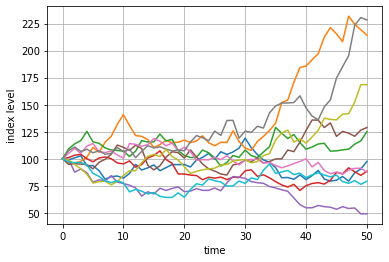

In [4]:
# 시뮬레이션 경로중  10개만 시각화
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
# tag: gbm_dt_paths
# title: Simulated geometric Brownian motion paths
# size: 60

# 동적 시뮬레이션을 사용하면 다음과 같이 경로를 시각화할 수 있을 뿐만 아니라 
# 아메리칸/버뮤다 옵션처럼 페이오프가 경로 의존적인 옵션의 가격도 계산가능하다. 즉 모든 동적 특성을 고려할 수 있다.

In [7]:
# 분산 감소
# 지금까지 우리가 사용한 파이썬 함수는 준-난수를 사용하고 샘플의 수도 계속 달라지기 때문에 
# 생성된 숫자들이 우리가 기대하거나 원했던 통계적 특성을 충분하게 보이지 않을 수 있다.
# 예를 들어 평균이 0이고 표준편차가 1인 표준정규분포를 만들고자 할 때 실제 생성된 난수들이 어떤 통계치를 보이는지 살펴보자.
# 정확한 비교를 위해 난수 생성기의 시드 값(seed value)를 고정시킨다.

# 분산 감소 난수 생성 기법
# 분산 감소 기법은 시뮬레이션 시간을 줄이는 효과가 있음
# 참고 : https://wikidocs.net/14402

print("%15s %15s" % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    np.random.seed(1000)
    sn = np.random.standard_normal(i ** 2 * 10000)
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

# 샘플의 수
print(i ** 2 * 10000)

# 샘플 숫자가 클수록 통계치가 나아지는 것을 알 수 있다. 
# 하지만 난수의 수가 8,000,000개가 넘는 가장 큰 샘플에서도 우리가 원하는 수준에는 도달하지 못했다.
# 다행스럽게도 표준정규분포의 처음 두 개의 모멘트 값을 개선하고 어렵지 않게 구현할 수 있는 분산감소(variance reduction)방법이 존재한다
# 첫 번째 방법은 대조 변수(antithetic variates)를 사용하는 것이다.
# 이 방법은 난수를 원하는 수의 절반만 생성하고 생성된 숫자의 부호를 반대로 한 난수를 추가로 포함하는 방법이다.
# 예를 들어, 만약 난수 생성기에 해당하는 파이썬 함수가 0.5를 만들면 -0.5를 난수 집합에 포함하는 것이다.

Mean  Std. Deviation
-------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


In [8]:
# numpy에서는 concatenate 함수를 써서 구현된다.
print("%15s %15s" % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    np.random.seed(1000)
    sn = np.random.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

# 이 방법을 쓰면 (당연하게도) 1차 모멘트가 정확하게 0으로 맞추어진다.
# 숫자 n이 생성될 때 숫자 -n도 같이 생성되기 때문이다.
# 모든 난수가 이러한 쌍을 이루므로 전체 평균은 0이 된다.
# 그러나 이 방법은 2차 모멘트인 표준편차에는 영향을 미치지 않는다.

Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [9]:
# 모멘트 정합(momentum matching)이라고 부르는 다른 분산 감소 방법을 쓰면 1차와 2차 모멘트를 같이 수정할 수 있다.
sn = np.random.standard_normal(10000)
print(sn.mean())
print(sn.std())

# 모든 난수에서 샘플 평균을 빼고 샘플 표준편차로 나누면 우리가 원하던 바와 같이 
# 표준정규분포의 1차와 2차 모멘트를 거의 정확하게 만족시키는 난수의 집합을 구할 수 있다.

sn_new = (sn - sn.mean()) / sn.std()
print(sn_new.mean())
print(sn_new.std())

-0.001165998295162494
0.991255920204605
-2.3803181647963357e-17
0.9999999999999999


In [10]:
# 다음은 각각의 분산 감소 방법을 이용하여 표준정규분포를 따르는 난수를 생성하는 함수이다.
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M : int
        number of time intervals for discretization
    I : int
        number of paths to be simulated
    anti_paths: boolean
        use of antithetic variates
    mo_math : boolean
        use of moment matching
    '''
    if anti_paths is True:
        sn = np.random.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = np.random.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

In [ ]:
# 가치 평가
# 몬테카를로 시뮬레이션의 가장 중요한 응용은 옵션, 파생상품, 하이브리드 상품 등의 조건부 청구권(contingent claims)의 가치를 평가하는 것이다.
# 쉽게 말하자면 조건부 청구권의 가치는 위험 중립 또는 마틴게일 측도(risk-neutral(martingale) measure)하에서 기대 페이오프를 할인한 것과 같다.
# 위험 중립 측도는 주식, 지수 등의 모든 위험 요인이 무위험 단기 이자율에 따라 증가하도록 하는 확률 측도(probability measure)이다.
# 자산 가격결정 기본 정리(Fundamental Theorem of Asset Pricing)에 따르면 
# 무위험 차익 거래의 부존재(absence of arbitrage)와 위험 중립 측도의 존재는 서로 동치(equivalent)이다.

# 금융 옵션은 지정된 금융 상품을 특정한 만기일에(유러피안 옵션) 또는 특정한 기간 동안(아메리칸 옵션) 
# 행사가(strike price)라고 주어진 가격에 사거나(콜 옵션) 팔(풋 옵션)수 있는 권리를 가진다.

In [11]:
import numpy as np
import scipy.stats as stat

# 정적인 몬테카를로 시뮬레이션 즉, 만기 주가만 시뮬레이션
def gbm_mcs_stat_europian(S, K, T, r, sigma, option_type):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    
    '''
    # 분산감소, 모멘트 정합을 이용하여 표준정규분포를 따르는 난수 생성
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * np.sqrt(T) * sn[1])
    

    if option_type == 'call':
        # calculate payoff at maturity
        hT = np.maximum(ST - K, 0)

        # calculate MCS estimator
        return np.exp(-r * T) * np.sum(hT) / I

    else:
        # calculate payoff at maturity
        hT = np.maximum(K - ST, 0)

        # calculate MCS estimator
        return np.exp(-r * T) * np.sum(hT) / I

# 동적인 몬테카를로 시뮬레이션 으로 구한 유러피언 옵션. 
def gbm_mcs_dyna_europian(S, K, T, r, sigma, option_type):

    # 만기 주가는 다음과 같은 식을 따름. 유도는 13장 참고 
    # ST = S * np.exp((r-0.5 * sigma ** 2)*T + sigma * np.sqrt(T) * z)

    S0 = S
    I = 100000                                  # 시뮬레이션 횟수
    M = 50                                    # 만기까지 기간을 M 구간 나눔
    dt = T/M

    # np.random.seed(0)                         # 난수 초기값 설정
    # z = np.random.standard_normal((M+1,I))    # 난수 생성 (M+1 by I)
    # 분산감소, 모멘트 정합을 이용하여 표준정규분포를 따르는 난수 생성
    sn = gen_sn(M, I)

    S = np.zeros((M+1,I))
    S[0] = S0                                 # [S0, ... S0] 리스트 안의 원소수 I개

    for t in range(1, M+1):
        S[t] = S[t-1] * np.exp((r-0.5 * sigma ** 2)*dt + sigma * np.sqrt(dt) * sn[t])

    # 즉 S는 M구간의 주가이동경로를 I개 만큼 가지고 있음. 주가이동경로는 기하브라운운동(gbm))
    # 마지막 구간 즉 만기에서 나온 값들을 평균냄
    # 여기서 주의해야할 점은 np.max와 np.maximum이 다르다는 것. 
    # np.max는 전체 배열에서 최대 요소 값을 찾음. np.maximum은 요소 별 최댓값을 찾음
    if option_type == 'call':
        hT = np.maximum(S[-1] - K, 0)

        return np.exp(-r * T) * np.sum(hT) / I

    else:
        hT = np.maximum(K - S[-1], 0)

        return np.exp(-r * T) * np.sum(hT) / I

# 블랙-숄즈-머튼 모형의 유러피언 옵션과 비교
def europian_option(S, K, T, r, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    if option_type == 'call':
        V = S * stat.norm.cdf(d1) - K * np.exp(-r * T) * stat.norm.cdf(d2)

    else:
        V = K * np.exp(-r * T) * stat.norm.cdf(-d2) - S * stat.norm.cdf(-d1)

    return V

print(europian_option(100,105,1,0.05,0.2,'call'))
print(europian_option(100,105,1,0.05,0.2,'put'))

print(gbm_mcs_stat_europian(100,105,1,0.05,0.2,'call'))
print(gbm_mcs_stat_europian(100,105,1,0.05,0.2,'put'))

print(gbm_mcs_dyna_europian(100,105,1,0.05,0.2,'call'))
print(gbm_mcs_dyna_europian(100,105,1,0.05,0.2,'put'))

8.021352235143176
7.9004418077181455
8.007834127497672
7.87541808525943
8.031715102784641
7.851027993530819


In [13]:
# 문제는 이렇게 시뮬레이션 방식으로 계산한 값이 블랙-숄즈-머튼 가치 평가 공식으로 계산한 벤치마크 값과 얼마나 일치하는가이다.
# 다양한 행사가에 대해 상대적인 옵션 가격을 계산해보자.

stat_res_call = []
stat_res_put = []
dyna_res_call = []
dyna_res_put = []
anal_res_call = []
anal_res_put = []

k_list = np.arange(80., 120.1, 5.)
np.random.seed(200000)
for K in k_list:
    stat_res_call.append(gbm_mcs_stat_europian(100,K,1,0.05,0.2,'call'))
    stat_res_put.append(gbm_mcs_stat_europian(100,K,1,0.05,0.2,'put'))
    dyna_res_call.append(gbm_mcs_dyna_europian(100,K,1,0.05,0.2,'call'))
    dyna_res_put.append(gbm_mcs_dyna_europian(100,K,1,0.05,0.2,'put'))
    anal_res_call.append(europian_option(100,K,1,0.05,0.2,'call'))
    anal_res_put.append(europian_option(100,K,1,0.05,0.2,'put'))

stat_res_call = np.array(stat_res_call)
stat_res_put = np.array(stat_res_put)
dyna_res_call = np.array(dyna_res_call)
dyna_res_put = np.array(dyna_res_put)
anal_res_call = np.array(anal_res_call)
anal_res_put = np.array(anal_res_put)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C02FAE080>


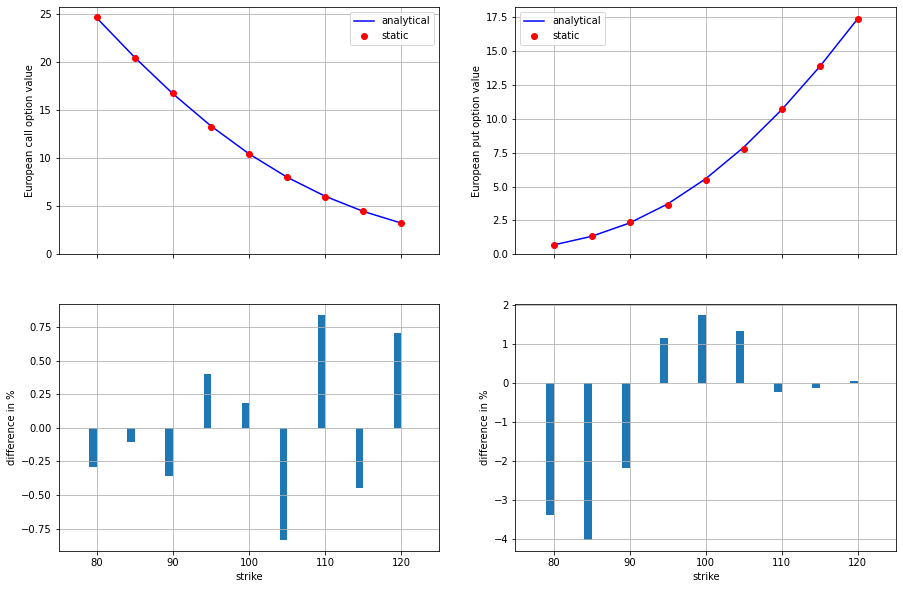

In [18]:
# 정적 시뮬레이션 시각화

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(15, 10))

ax[0][0].plot(k_list, anal_res_call, 'b', label='analytical')
ax[0][0].plot(k_list, stat_res_call, 'ro', label='static')
ax[0][0].set_ylabel('European call option value')
ax[0][0].grid(True)
ax[0][0].legend(loc=0)
ax[0][0].set_ylim(ymin=0)
wi = 1.0
ax[1][0].bar(k_list - wi / 2, (anal_res_call - stat_res_call) / anal_res_call * 100, wi)
ax[1][0].set_xlabel('strike')
ax[1][0].set_ylabel('difference in %')
ax[1][0].set_xlim(left=75, right=125)
ax[1][0].grid(True)

ax[0][1].plot(k_list, anal_res_put, 'b', label='analytical')
ax[0][1].plot(k_list, stat_res_put, 'ro', label='static')
ax[0][1].set_ylabel('European put option value')
ax[0][1].grid(True)
ax[0][1].legend(loc=0)
ax[0][1].set_ylim(ymin=0)
wi = 1.0
ax[1][1].bar(k_list - wi / 2, (anal_res_put - stat_res_put) / anal_res_put * 100, wi)
ax[1][1].set_xlabel('strike')
ax[1][1].set_ylabel('difference in %')
ax[1][1].set_xlim(left=75, right=125)
ax[1][1].grid(True)
# tag: opt_val_comp_1
# title: Comparsion of static and dynamic Monte Carlo estimator values
# size: 60

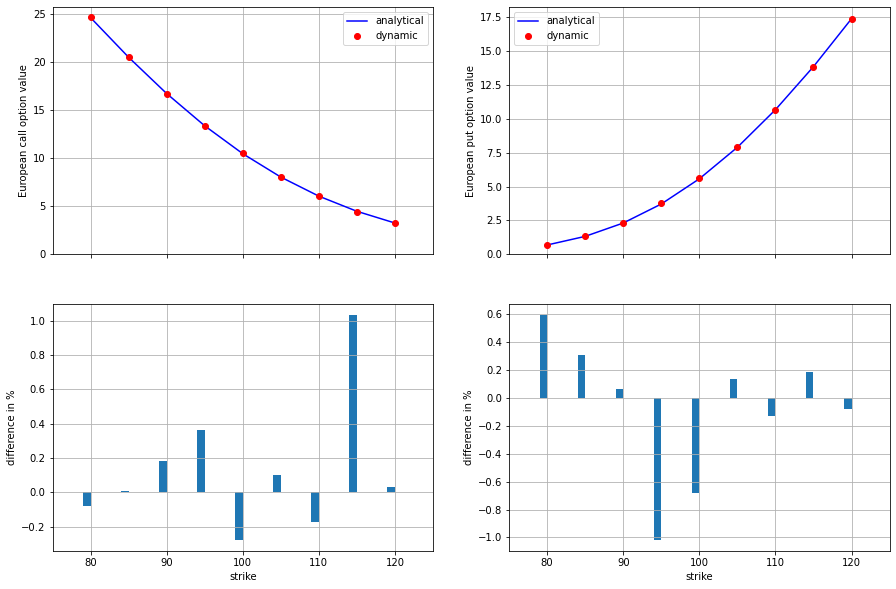

In [19]:
# 동적 시뮬레이션 시각화
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(15, 10))

ax[0][0].plot(k_list, anal_res_call, 'b', label='analytical')
ax[0][0].plot(k_list, dyna_res_call, 'ro', label='dynamic')
ax[0][0].set_ylabel('European call option value')
ax[0][0].grid(True)
ax[0][0].legend(loc=0)
ax[0][0].set_ylim(ymin=0)
wi = 1.0
ax[1][0].bar(k_list - wi / 2, (anal_res_call - dyna_res_call) / anal_res_call * 100, wi)
ax[1][0].set_xlabel('strike')
ax[1][0].set_ylabel('difference in %')
ax[1][0].set_xlim(left=75, right=125)
ax[1][0].grid(True)

ax[0][1].plot(k_list, anal_res_put, 'b', label='analytical')
ax[0][1].plot(k_list, dyna_res_put, 'ro', label='dynamic')
ax[0][1].set_ylabel('European put option value')
ax[0][1].grid(True)
ax[0][1].legend(loc=0)
ax[0][1].set_ylim(ymin=0)
wi = 1.0
ax[1][1].bar(k_list - wi / 2, (anal_res_put - dyna_res_put) / anal_res_put * 100, wi)
ax[1][1].set_xlabel('strike')
ax[1][1].set_ylabel('difference in %')
ax[1][1].set_xlim(left=75, right=125)
ax[1][1].grid(True)
# tag: opt_val_comp_2
# title: Comparsion of static and dynamic Monte Carlo estimator values
# size: 60

# 정적 동적 모두 양과 음의 오차가 모두 존재한다.
# 일반적으로 몬테카를로 추정치의 품질은 시간 간격의 수 M과 시뮬레이션 경로의 수 I를 바꾸어 조절할 수 있다.

- 기하 브라운 운동 모형

- 기하 브라운 운동(Geometric Brownian Motion) 모형은 다음과 같은 확률 미분 방정식을 따른다.

    - dS(t) = α(t)*S(t)dt + σ(t)*S(t)*dW(t)
 
    - 상승률(drift)  α(t) 와 변동성  σ(t) 는 확률론적이 아니라 결정론적으로 미리 정해저 있다.

    - 주가 S(t)와 상승률  α(t) 의 곱에 따라 상승한다. 즉 현재 주가의 상승률 비율로 증가한다.

    - 주가 S(t)와 변동성  σ(t) 의 곱에 따라 변동한다.

- 금융공학에서 중요한 또 하나의 확률 과정은 단기 이자율이나 변동성 모형에 사용되는 평균 회귀 과정임

- 평균 회귀 과정에서 가장 널리 사용되는 모형은 콕스-잉거솔-로스 가 제안한 제곱근 확산 모형 (마찬가지로 확률 미분 방정식)

- 제곱근 확산 모형

- 제곱근 확산 모형(square-root diffusion model)은 평균 회귀 모형(mean-reversion model)의 일종이다. 

- 확률 과정의 값이 장기 평균  θ 에서 멀어지면 더 큰 상승(하강)률로 장기 평균 쪽으로 움직인다.

    - dx(t)= κ * (θ−x(t)) * dt + σ * √x(t) * dW(t)

        - x(t) : 시간 t에서의 확률 과정 값

        - κ  : 평균 회귀 계수 (속도)

        - θ  : 확률 과정의 장기 평균

        - σ  : 고정 변동성

        - dW(t) : 표준 브라운 운동
    
     - x(t)가 카이 제곱 분포를 따른다는 사실은 잘 알려져 있다. 그러나 앞서 말한 바와 같이 많은 금융공학 모형이 이산화가 가능하고 정규분포로 근사화가 가능하다.

     - 오일러 방법은 기하 브라운 운동 모형에만 정확히 적용 가능하고 대부분의 다른 확률 과정에서는 편향 오차를 가진다.

     - 제곱근 확산 과정에 대해서도 정확한 이산 방법이 존재하기는 하지만 오일러 방법을 사용하는 쪽이 계산상 장점이 많다.

     - s = t - dt 와 x^+ = max(x,0) 으로 정의하면 오일러 방식을 적용할 수 있다.

     - 이 방식은 full truncation 이산화 방식이라고 불리운다.

     ![square_root](./square_root.jpg)
     

     

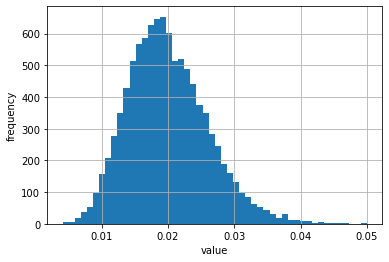

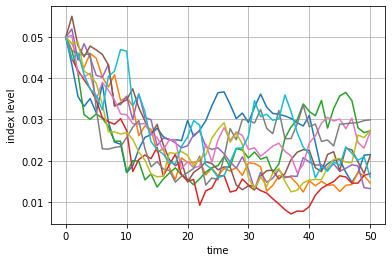

In [28]:
# 단기 이자율 모형 시뮬레이션을 위해 다음과 같은 파라미터 값을 준다.

x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

# 제곱근 확산 과정은 x(t) 값이 항상 양수로 유지된다는 현실적이고 편리한 특성을 가진다.
# 하지만 단순 오일러 방식으로 이산화하면 음수가 될 가능성이 생기기 때문에 이처럼 원래의 시뮬레이션 값에서 양수만을 취하는 방식을 사용한다.
# 따라서 시뮬레이션 코드에도(확률 과정의 값을 저장하기 위해) 하나가 아닌 두 개의 ndarray 객체가 필요하다.

I = 10000
M = 50
dt = T / M
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
              + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
              + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)  
              * np.random.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1
x1 = srd_euler()

# 시뮬레이션 결과를 히스토그램으로 시각화
# 제곱근 확산 과정 시뮬레이션 결과에 따른 만기 값(오일러 방식)

plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)
plt.show()
# tag: srd_hist_Euler
# title: Simulated square-root diffusion at maturity (Euler scheme)
# size: 60

# 처음 10개의 시뮬레이션 경로 시각화. 현재 값이 장기 평균 세타=0.02 보다 높기 때문에 표류 경향이 음수가 되고 장기평균으로 수렴하는 것을 볼 수 있다.
# 제곱근 확산 과정 시뮬레이션 경로 (오일러 방식) 시각화
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.show()
# tag: srd_dt_Euler
# title: Simulated square-root diffusion paths (Euler scheme)
# size: 60


- 이 확률 과정을 완벽하게 시뮬레이션 하면 다음과 같다.
![square_root_diffusion](./square_root_dist.jpg)

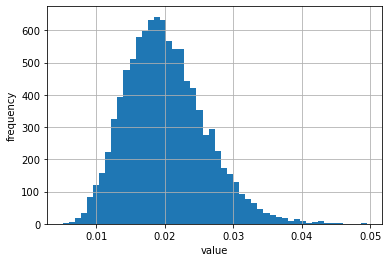

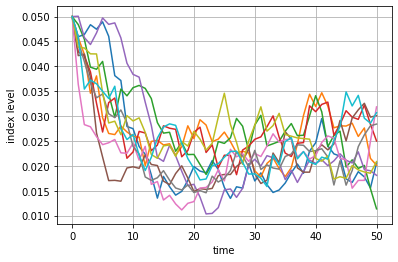

In [29]:
# 이 이산화 과정을 파이썬으로 구현하면 좀 복잡해지긴 하지만 간결한 형태이다
def srd_exact():
    x2 = np.zeros((M + 1, I))
    x2[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x2[t - 1] 
        x2[t] = c * np.random.noncentral_chisquare(df, nc, size=I)
    return x2
x2 = srd_exact()


# 시뮬레이션 결과를 히스토그램으로 시각화
# 제곱근 확산 과정 시뮬레이션 결과에 따른 만기 값(정확한 이산화 방식)

plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)
plt.show()
# tag: srd_hist_exact
# title: Simulated square-root diffusion at maturity (exact scheme)
# size: 60

# 처음 10개의 시뮬레이션 경로 시각화. 현재 값이 장기 평균 세타=0.02 보다 높기 때문에 표류 경향이 음수가 되고 장기평균으로 수렴하는 것을 볼 수 있다.
# 제곱근 확산 과정 시뮬레이션 경로 (오일러 방식) 시각화
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.show()
# tag: srd_dt_exact
# title: Simulated square-root diffusion paths (exact scheme)
# size: 60

In [30]:
# 이산화 방식에 따른 차이를 살펴보면 편향 오차를 지닌 오일러 방식도 통계치만으로 볼 때는 괜찮은 성능을 보이고 있다.
print_statistics(x1[-1], x2[-1])

# 실행 속도 면에서는 비중심 카이 제곱 분포에서 직접 샘플링하는 방식이 표준 정규분포를 이용하는 것보다 계산상 부담이 크다.
# 근데 실행시간은... 오히려 정확한 이산화가 왜 빠르지??
I = 250000
%time x1 = srd_euler()
%time x2 = srd_exact()


# 정확한 이산화 방식의 경우 거의 같은 결과를 내는 오일러 방식보다 약 2배의 시간이 걸린다.
print_statistics(x1[-1], x2[-1])


statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.004          0.005
           max          0.050          0.050
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.558          0.580
      kurtosis          0.498          0.528
Wall time: 3.12 s
Wall time: 2.57 s
     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.003
           max          0.059          0.059
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.567          0.579
      kurtosis          0.513          0.490


- 확률적 변동성 모형

- 블랙-숄즈-머튼 모형의 최대 단순 과정 중의 하나는 변동성이 변하지 않는다는 점임

- 그러나 변동성은 일반적으로 고정되어 있지도 않고 결정론적이 아닌 확률적인 값

- 1990년대 확률적 변동성 모형 도입 (헤스톤 확률적 변동성 모형(1993))

- 변동성도 관측되지는 않지만 주가와 같은 확률 과정이라고 가정하고 두 개의 서로 영향을 미치는 확률 과정으로 주가의 움직임을 정의한 것이 확률적 변동성 모형(stochastic volatility model)이다. 

- 확률적 변동성 모형 중 가장 널리 쓰이는 것이 다음과 같은 헤스톤 모형(Heston model)이다.

    - dS(t) = αS(t)dt + σ(t)S(t)dW1(t)
    
    - dν(t) = κ(θ−ν(t))dt + σ * √ν(t) * dW2(t)
    
    - dW1(t) * dW2(t) = ρ
 
    - 이 식에서  ρ 는 두 개의 표준 브라운 운동 dW1(t), dW2(t)의 순간상관계수(instantaneous correlation coefficient)이다.

    - 상관계수에 의해 시장이 하락할 때 변동성이 증가하고 시장이 상승할 때 변동성이 감소하는 이른바 레버리지 효과를 설명하는 것이 가능하다.

    - ![heston](./heston.jpg)

In [31]:
# 이 모형에 대해 다음과 같은 인수 값을 가정한다.

S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

# 두 확률의 상관관계를 구하려면 상관계수 행렬(correlation matrix)에 대한 춀레스키 분해(Cholesky demopostion)이 필요하다.
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

print(cho_mat)

# 확률 과정 시뮬레이션을 시작하기에 앞서 일단 시뮬레이션에 사용될 난수를 미리 생성한다.
# 집합 0은 주가의 확률과정 집합 1은 변동성의 확률과정에 사용한다.

M = 50
I = 10000
ran_num = np.random.standard_normal((2, M + 1, I))

# 제곱근 확산 과정 모형에 기반한 변동성 과정에 대해서는 상관관계를 고려한 오일러 이산화 방법을 사용한다.
dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
          + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt)  
          * ran[1])
v = np.maximum(vh, 0)

# 주가 과정도 마찬가지로 상관관계를 고려하고 정확한 형태의 기하 브라운 운동 오일러 방식으로 이산화한다.
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

# 여기서 왜 제곱근 화간 과정에 오일러 방식을 사용하는 것이 좋은지 알 수 있다.
# 오일러 방식을 사용하면 표준정규분포를 사용하므로 샘플 생성 시 상관관계를 간단하고 일관적으로 적용할 수 있다.
# 만약 주가 과정에는 오일러 방식을 사용하고 변동성 과정에는 비중심 카이제곱에 기반한 방식을 적용한다면 상관관계를 일관성있게 적용하기 어렵다.

[[1.  0. ]
 [0.6 0.8]]


statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         18.532          0.169
           max        736.545          0.334
          mean        107.889          0.243
           std         52.280          0.020
          skew          1.843          0.156
      kurtosis          7.598          0.094


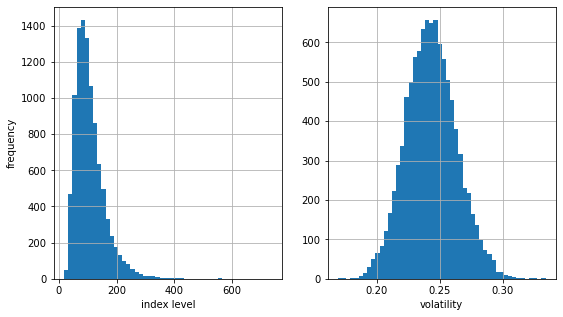

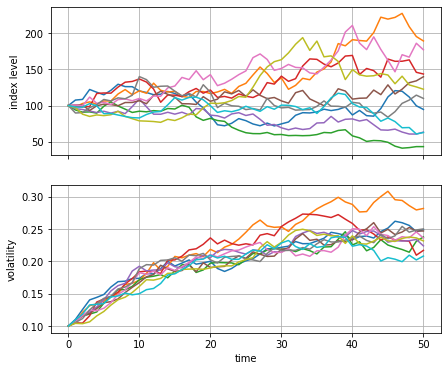

In [33]:
# 주가와 변동성 두 확률 과정을 시뮬레이션한 결과를 히스토그램으로 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True)
# tag: sv_hist
# title: Simulated stochastic volatility model at maturity
# size: 60

# 각 확률 과정의 시뮬레이션 경로를 10개씩 살펴보면 변동성 과정은 양의 표류 경향을 보이며 0.25로 수렴한다.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax1.grid(True)
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)
# tag: sv_paths
# title: Simulated stochastic volatility model paths
# size: 60

# 마지막으로 두 자료의 통계치를 살펴보면 주가 과정은 최댓값이 기하 브라운 운동 모형보다 큰 것을 알 수 있다.
# 이는 다른 조건은 같은데 변동성이 고정값이 아니라 지속적으로 증가하였기 때문이다.
print_statistics(S[-1], v[-1])


- 점프 확산

- 확률적 변동성과 레버리지 효과는 대다수 시장에서 관찰할 수 있는 특징적인 현상

- 시장에서 볼 수 있는 또 하나의 특징은 자산 가격이나 변동성이 점프하는 현상

- 1976년 머튼은 로그 정규분포에 점프 요인을 더하여 블랙-숄즈-머튼 모형을 개선한 점프 확산 모형을 발표

- 점프 확산 모형은 자산가격이 연속적으로 움직이는 것이 아니라 순간적으로 점프하는 특징을 포함하는 주가 모형이다.

- 점프 시각이 포아송 분포(Poisson distribution)에 의해 결정되는 확률 과정을 포아송 과정(Poisson process) N(t)이라고 한다.

- 점프 크기 J(t)는 로그 노말 분포(log normal distribution)를 가진다.

    - dS(t) = (α−αJ)S(t)dt + σ(t)S(t)dW1(t) + J(t)S(t)dN(t)

    - ![jump](./jump.jpg)

In [34]:
# 다음과 같은 인수 값을 적용한다.

S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

# 점프 확산 모형을 시뮬레이션하려면 3개의 독립적인 난수 집합이 필요하다.

M = 50
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = np.random.standard_normal((M + 1, I))
sn2 = np.random.standard_normal((M + 1, I))
poi = np.random.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)


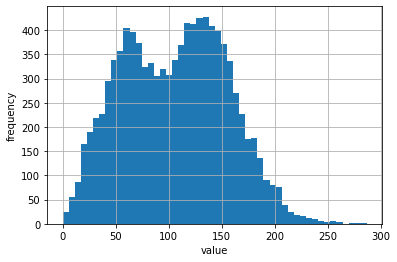

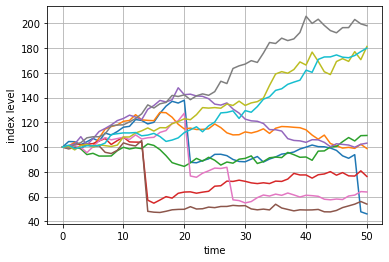

In [36]:
# 점프의 평균값에 대해 큰 음수 값을 가정하였기 때문에 시뮬레이션된 주가가 전형적인 로그 정규분포보다 우편향을 보이는 것을 확인할 수 있다.


plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)
plt.show()
# tag: jd_hist
# title: Simulated jump diffusion at maturity
# size: 60

# 주가가 아래쪽으로 점프하는 현상은 10개의 시뮬레이션 경로에서도 볼 수 있다.
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.show()
# tag: jd_paths
# title: Simulated jump diffusion paths
# size: 60

In [37]:
# 아메리칸 옵션을 평가하는 것은 유러피안 옵션보다 더 복잡하다.
# 이 경우는 옵션 가치 계산과 관련하여 최적 정지 문제(optimal stopping problem)을 풀어야 한다.
# 기존 몬테카를로 시뮬레이션의 가장 큰 문제점은 전진 알고리즘이기 때문에 
# 만기에서부터 보유 가치를 계산하여 후진하는 알고리즘을 구하는 아메리칸 옵션 가치 평가에 사용하기 힘듬

# 이 문제는 시뮬레이션 상에서 이산 시간 그리드를 사용하여 풀 수 있다.
# 이렇게 하면 사실 아메리칸 옵션이 아니라(특정 그리드 점에서 행사가 가능한) 버뮤다 옵션 문제를 푸는 셈이지만
# 시간 그리드의 간격을 좁히면 아메리칸 옵션으로 수렴한다.

# 아메리칸 옵션의 가치를 평가할 수 있는 몬테카를로 시뮬레이션으로 최소 자승 몬테카를로(LSM, least-squares monte carlo)가 있음
# 최소 자승 몬테카를로 방법은 같은 시간대의 모든 보유 가치(continuation value) 시뮬레이션 값을 계산하기 위해 최소 자승 회귀법을 사용한다.
# 다음 값들을 기반으로 한다.
# (1) 시뮬레이션된 기초자산의 가격, (2) 옵션의 내재 가치, (3) 특정 경로에 대한 실제 보유 가치

# 아메리칸 콜 옵션과 풋 옵션 가치를 계산하기 위한 알고리즘
def gbm_mcs_amer(S, K, T, r, sigma, option_type):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    '''

    S0 = S
    dt = T / M
    df = np.exp(-r * dt)

    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0

    # 분산감소, 모멘트 정합을 이용하여 표준정규분포를 따르는 난수 생성
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    # case based calculation of payoff
    if option_type == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    
    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    
    # MCS estimator
    C0 = df * 1 / I * np.sum(V[1])
    return C0

print(gbm_mcs_amer(100,110,1,0.05,0.2,'call'))
print(gbm_mcs_amer(100,110,1,0.05,0.2,'put'))

5.820935248058194
11.944652645157387


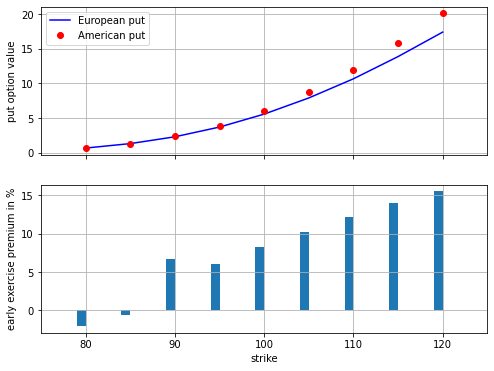

In [39]:
# 유러피언 옵션의 가치는 아메리칸 옵션 가치의 하한(lower bound)이 된다.
# 두 옵션 가치의 차이는 조기 행사 프리미엄(early exercise premium)이라 부른다.
# 다음 코드에서 여러 가지 행사가에 따른 유러피안 옵션과 아메리칸 옵션의 가치를 비교하여 조기 행사 프리미엄을 추정하였다.
# 이 분석에는 풋 옵션을 사용하였다.(여기서는 배당을 고려하지 않았기 때문에 콜 옵션에는 조기 행사 프리임엄이 존재하지 않는다.)


euro_res = []
amer_res = []
k_list = np.arange(80., 120.1, 5.)
for K in k_list:
    euro_res.append(gbm_mcs_dyna_europian(100,K,1,0.05,0.2,'put'))
    amer_res.append(gbm_mcs_amer(100,K,1,0.05,0.2,'put'))
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

# 시각화 : 유러피안 옵션과 LMS 몬텤를로 방식으로 계산한 아메리칸 옵션 비교

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('put option value')
ax1.grid(True)
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)
# tag: opt_euro_amer
# title: Comparsion of European and LSM Monte Carlo estimator values
# size: 60

# 결과를 보면 행사가에 따라 조기 행사 프리미엄이 15% 까지도 올라가는 것을 볼 수 있다.
